# Rice-Yield Prediction in Bangladesh Using ML Model

We are working on a rice-yield prediction project using a dataset from Kaggle. Our focus is on predicting crop yields using the following key factors:

1. **Weather (Rainfall) per Year**
2. **Pesticides Usage per Year**
3. **Historical Crop Data**

We will utilize machine learning models to analyze this data and make predictions on future crop yields based on the patterns observed in these factors.
 

In [16]:
import pandas as pd
import numpy as np 

rainfall_df = pd.read_csv('data/rainfall.csv')
pesticides_df = pd.read_csv('data/pesticides.csv')
yield_df = pd.read_csv('data/yield.csv', sep=',', quotechar='"', on_bad_lines='skip')


### Data Cleaning for Crop Yield Prediction

This document explains the data cleaning and merging process for the **Crop Yield Prediction** project using rainfall, pesticide usage, and yield datasets. The goal is to filter the data for **Bangladesh** and focus on the crop item **"Rice, paddy"** for further analysis and model development.

### Datasets Used
The following datasets are used in this project:
1. **Rainfall Dataset** (`rainfall.csv`)
   - Contains annual rainfall data by region (referred to as `Area`).
   - Relevant columns: `Area`, `year`, and rainfall-related metrics.
   
2. **Pesticides Dataset** (`pesticides.csv`)
   - Contains annual pesticide usage data by region (referred to as `Area`).
   - Relevant columns: `Area`, `year`, and pesticides-related metrics.

3. **Yield Dataset** (`yield.csv`)
   - Contains crop yield data, including different items like "Rice, paddy", by region (referred to as `Area`).
   - Relevant columns: `Area`, `Item`, `year`, and yield-related metrics.

### Data Cleaning Steps

In [ ]:
# Filter rainfall and pesticides datasets for Bangladesh
rainfall_bd = rainfall_df[rainfall_df['Area'] == 'Bangladesh']
pesticides_bd = pesticides_df[pesticides_df['Area'] == 'Bangladesh']

In [ ]:
# Filter yield dataset for Bangladesh and "Rice, paddy"
yield_bd_rice = yield_df[(yield_df['Area'] == 'Bangladesh') & (yield_df['Item'] == 'Rice, paddy')]

In [ ]:
# Merge the datasets on 'year' column
merged_df = pd.merge(rainfall_bd, pesticides_bd, on='Year')
merged_df = pd.merge(merged_df, yield_bd_rice, on='Year')

In [ ]:
# Save the merged data to a new CSV file
merged_df.to_csv('data/bangladesh_rice_merged_data.csv', index=False)

In [17]:
#import our clean dataset
df = pd.read_csv('data/bangladesh_rice_merged_data.csv')

df.head()

,Area_x,Year,average_rain_fall_mm_per_year,Domain_x,Area_y,Element_x,Item_x,Unit_x,Value_x,Domain Code,Domain_y,Area Code,Area,Element Code,Element_y,Item Code,Item_y,Year Code,Unit_y,Value_y
0,Bangladesh,1990,2666,Pesticides Use,Bangladesh,Use,Pesticides (total),tonnes of active ingredients,1266.0,QC,Crops,16,Bangladesh,5419,Yield,27,"Rice, paddy",1990,hg/ha,25661
1,Bangladesh,1991,2666,Pesticides Use,Bangladesh,Use,Pesticides (total),tonnes of active ingredients,1287.0,QC,Crops,16,Bangladesh,5419,Yield,27,"Rice, paddy",1991,hg/ha,26592
2,Bangladesh,1992,2666,Pesticides Use,Bangladesh,Use,Pesticides (total),tonnes of active ingredients,1453.0,QC,Crops,16,Bangladesh,5419,Yield,27,"Rice, paddy",1992,hg/ha,26893
3,Bangladesh,1993,2666,Pesticides Use,Bangladesh,Use,Pesticides (total),tonnes of active ingredients,1487.0,QC,Crops,16,Bangladesh,5419,Yield,27,"Rice, paddy",1993,hg/ha,27185
4,Bangladesh,1994,2666,Pesticides Use,Bangladesh,Use,Pesticides (total),tonnes of active ingredients,1594.5,QC,Crops,16,Bangladesh,5419,Yield,27,"Rice, paddy",1994,hg/ha,25328


The following datasets column are used now:
1. `Value_x` is the pesticides uses on this year
2. `average_rain_fall_mm_per_year` is the avg rainfall on this year
3. `Value_y` is the total crop yield value on this year
4. `Unit_y` is the unit of crop yield

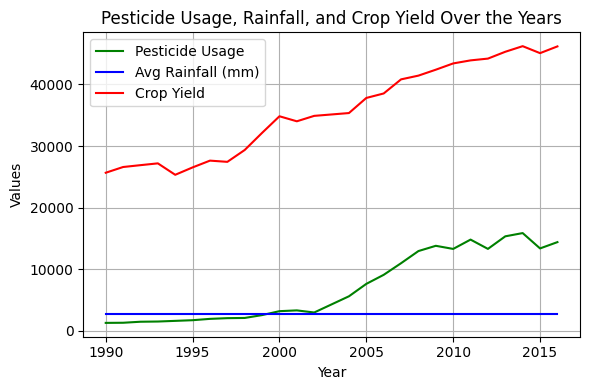

In [21]:
# import matplotlib for visualize data
import matplotlib.pyplot as plt

# Assuming df is our cleaned dataset which we import already
# Columns: 
# 'Year', 'Value_x' (pesticides), 
# 'average_rain_fall_mm_per_year', 
# 'Value_y' (crop yield)

# Now create plot
plt.figure(figsize=(6, 4))

# set our Plot values
plt.plot(df['Year'], df['Value_x'], label='Pesticide Usage', color='green')
plt.plot(df['Year'], df['average_rain_fall_mm_per_year'], label='Avg Rainfall (mm)', color='blue')
plt.plot(df['Year'], df['Value_y'], label='Crop Yield', color='red')

# Given labels and title
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Pesticide Usage, Rainfall, and Crop Yield Over the Years')

# Show legend to display our labels and title
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()



### Let's ready to linear regression using sklearn
We will use multi variable regression in sklearn model training

*Our Linear Equation is:*
    -`cy_values = m1 * rainfall + m2 * pesticide`

In [22]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
# Define features and target variable
X = df[['average_rain_fall_mm_per_year', 'Value_x']]  # Features: average rainfall and pesticide usage
y = df['Value_y']  # Target variable: crop yield

In [24]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
# Create a linear regression model from sklearn object
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [27]:
# predictions on the test set
y_pred = model.predict(X_test)

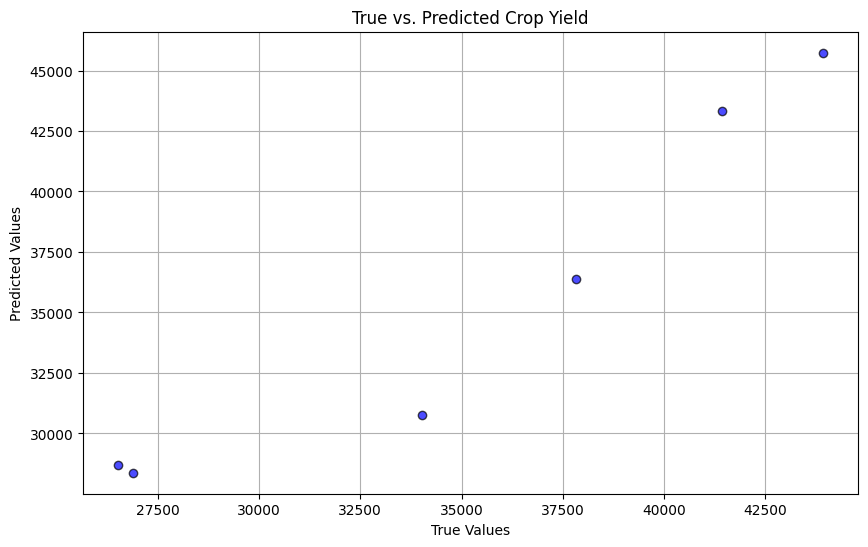

In [28]:
# Plot true vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Crop Yield')
plt.grid(True)
plt.show()

In [30]:
# Define the input values for prediction
# Example values: 1000 mm of rainfall and 50 units of pesticide
input_values = pd.DataFrame({
    'average_rain_fall_mm_per_year': [10200, 1200],  # Example rainfall values
    'Value_x': [50, 600]  # Example pesticide usage values
})

# Predict the crop yield for these input values
predicted_yield = model.predict(input_values)

# Display the predictions
for i, (rainfall, pesticide, yield_value) in enumerate(zip(input_values['average_rain_fall_mm_per_year'], input_values['Value_x'], predicted_yield)):
    print(f"Prediction {i+1}:")
    print(f"  Rainfall: {rainfall} mm")
    print(f"  Pesticide Usage: {pesticide} units")
    print(f"  Predicted Crop Yield: {yield_value:.2f} units")
    print()

Prediction 1:
  Rainfall: 10200 mm
  Pesticide Usage: 50 units
  Predicted Crop Yield: 26550.86 units

Prediction 2:
  Rainfall: 1200 mm
  Pesticide Usage: 600 units
  Predicted Crop Yield: 27266.32 units

